<a href="https://colab.research.google.com/github/Glasiermedic/credit-and-risk/blob/master/US_census_multi_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing functional libraries and notebook settings

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importing algorithm, analysis and cost reduction libraries


In [3]:
# importing datasets as needed (removing the comment '#' turns on line of code)

cen_14 = pd.read_csv('https://raw.githubusercontent.com/Glasiermedic/credit-and-risk/master/2014_adult.csv')
#cen_15 = pd.read_csv('https://raw.githubusercontent.com/Glasiermedic/credit-and-risk/master/acs2015_census_tract_data.csv', index_col = 0)
#cen_17 = pd.read_csv('https://raw.githubusercontent.com/Glasiermedic/credit-and-risk/master/acs2017_census_tract_data.csv', index_col = 0)


In [4]:
#cen_17.head(5)

In [5]:
#cen_15.head(5)

In [6]:
cen_14.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [7]:
cen_14 = cen_14.drop(['fnlwgt', 'education.num'], axis = 1)

In [8]:
feat_14 = cen_14.columns[:-1]
feat_14

Index(['age', 'workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country'],
      dtype='object')

In [9]:
cen_14.income = cen_14.income.replace({'>50K':1, '<=50K':0})

In [10]:
cen_14.workclass = cen_14.workclass.replace('?', 'retired')
cen_14.occupation = cen_14.occupation.replace('?', 'retired')

In [11]:
num_14 = ['age','capital.gain','capital.loss','hours.per.week']

cat_14 = feat_14.drop(num_14)
cat_14

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [12]:
cen_14.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,retired,HS-grad,Widowed,retired,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,retired,Some-college,Widowed,retired,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [30]:
cen_14["marital.status"] = cen_14["marital.status"].replace(['Married-civ-spouse','Separated','Married-spouse-absent','Married-AF-spouse'], 'married')
cen_14["marital.status"] = cen_14["marital.status"].replace({'Never-married': 'single', 'Divorced': 'divorced', 'Married': 'married', 'Widowed': 'widowed'})


In [31]:
cen_14['marital.status'].unique()

array(['widowed', 'divorced', 'married', 'single'], dtype=object)

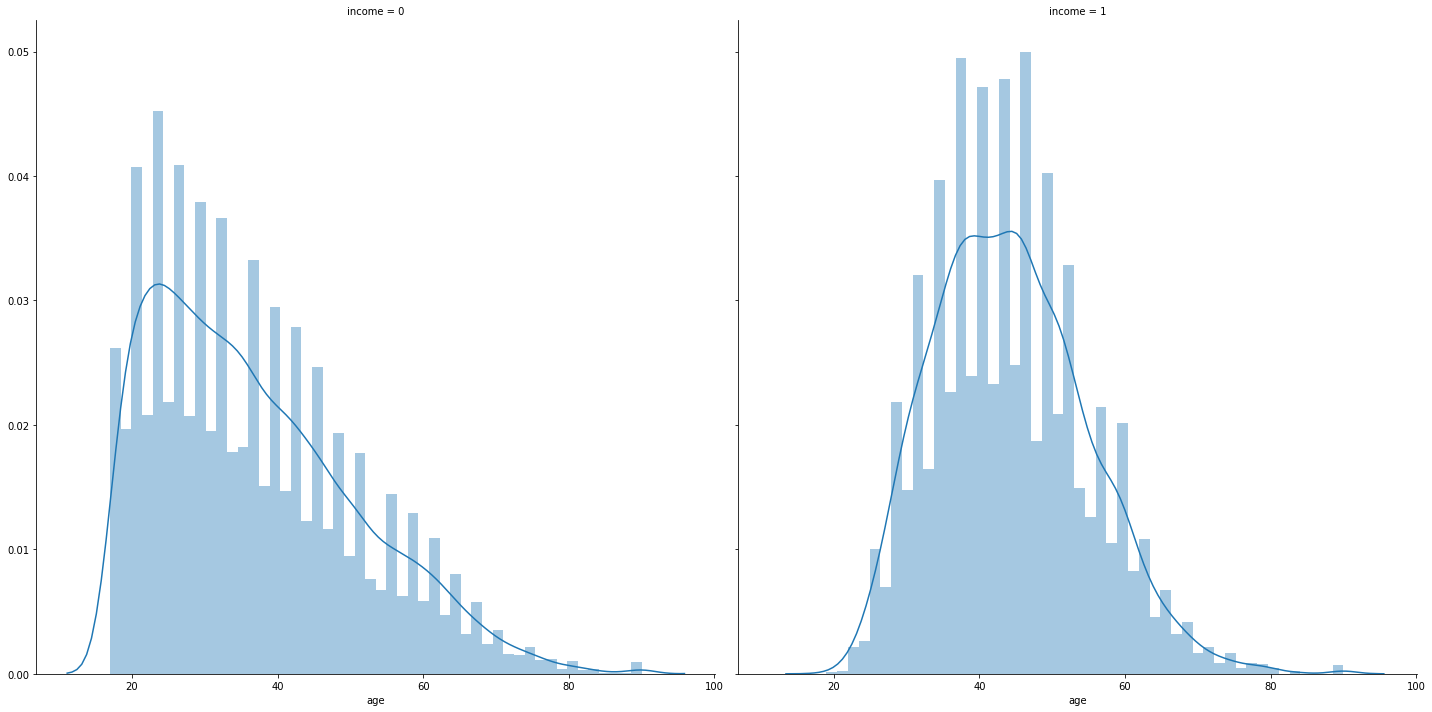

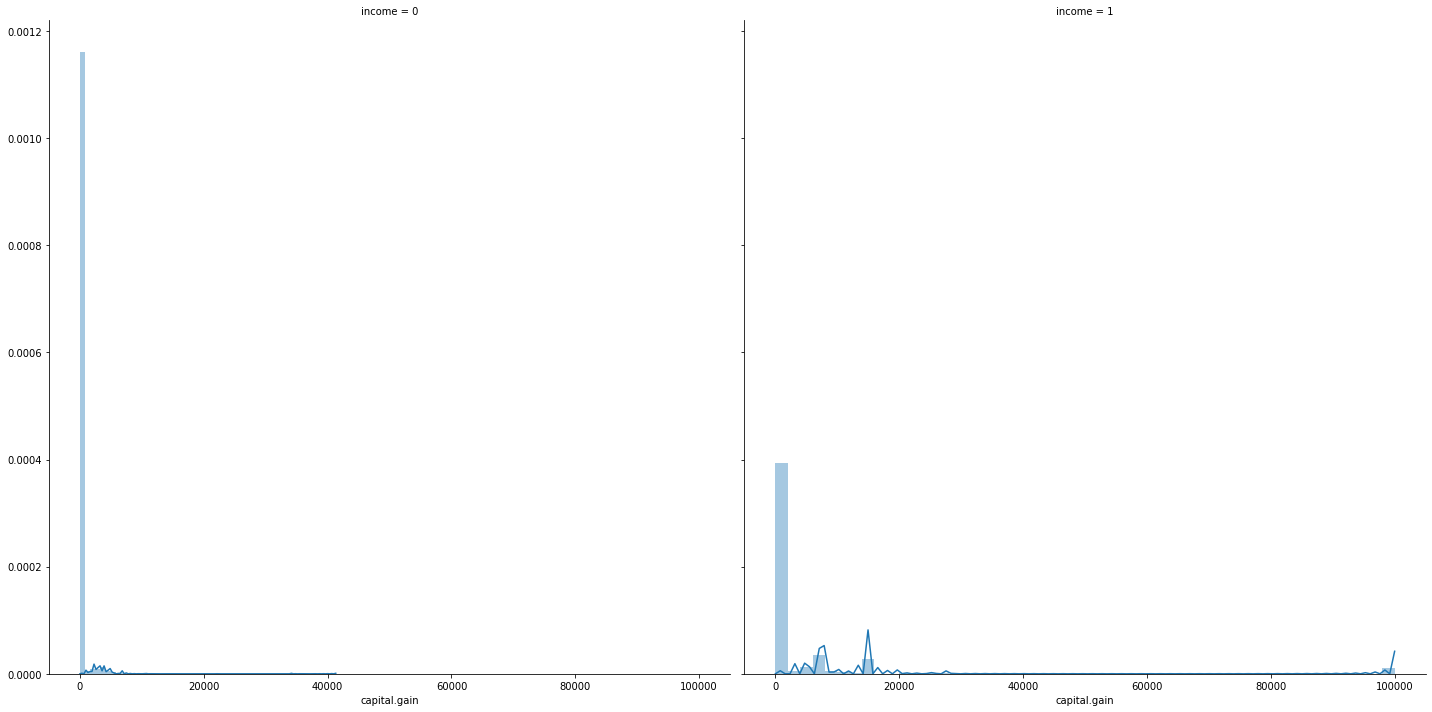

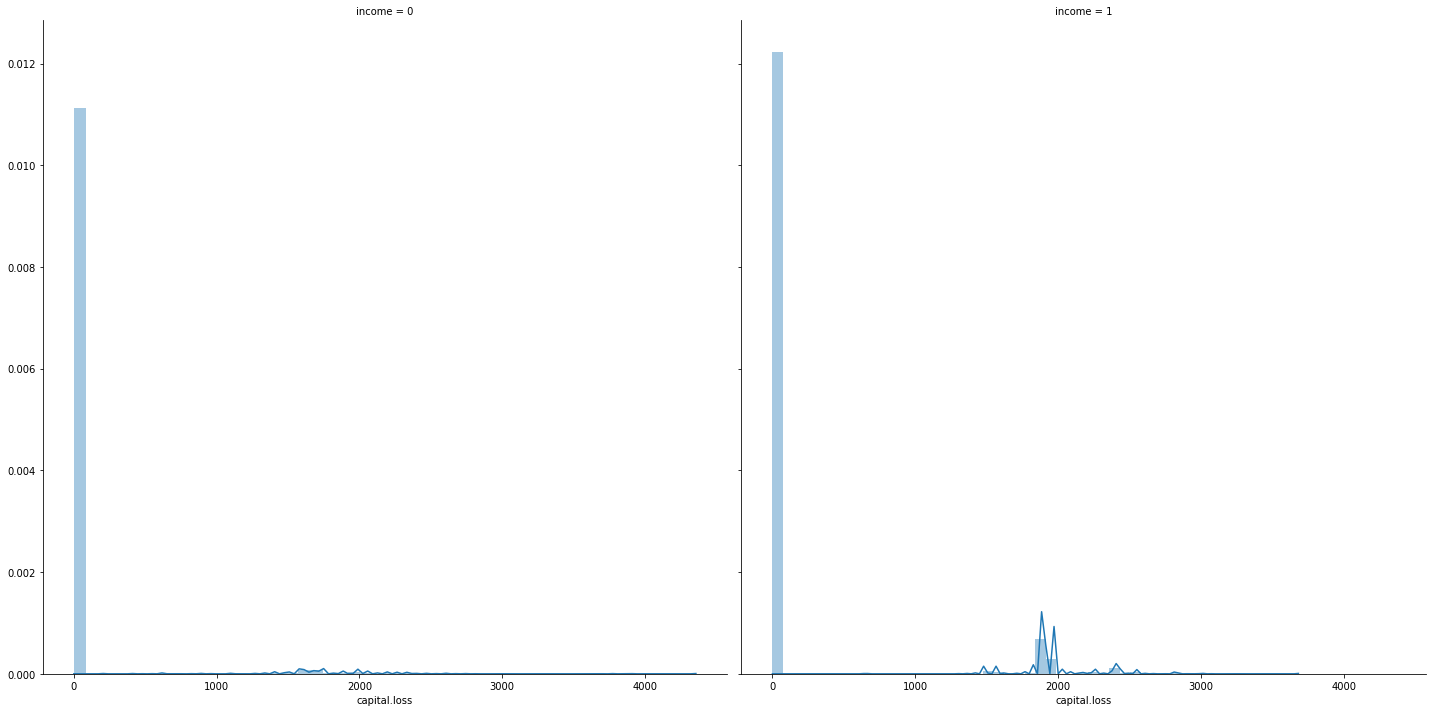

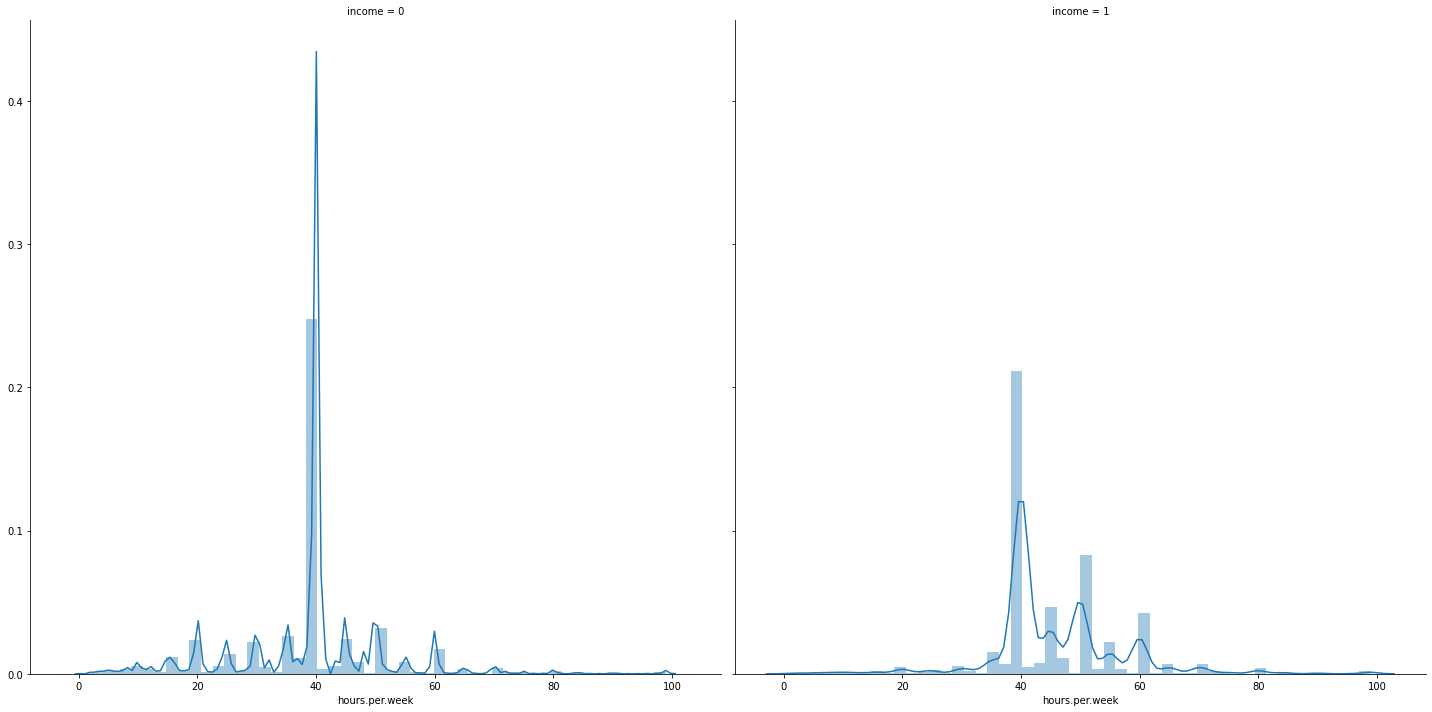

In [33]:
for i in num_14: 
  g = sns.FacetGrid(cen_14, col='income', height=10)
  g = g.map(sns.distplot, i)

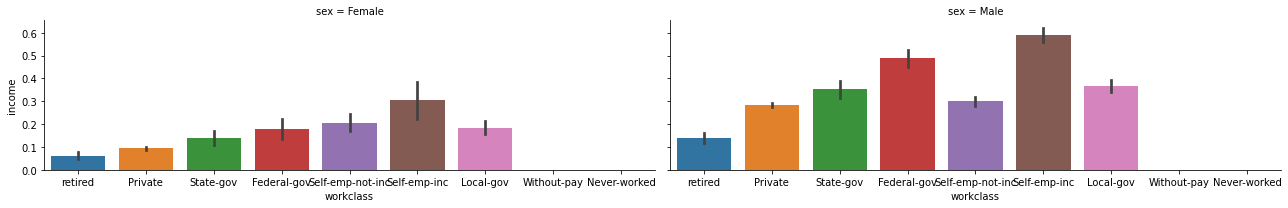

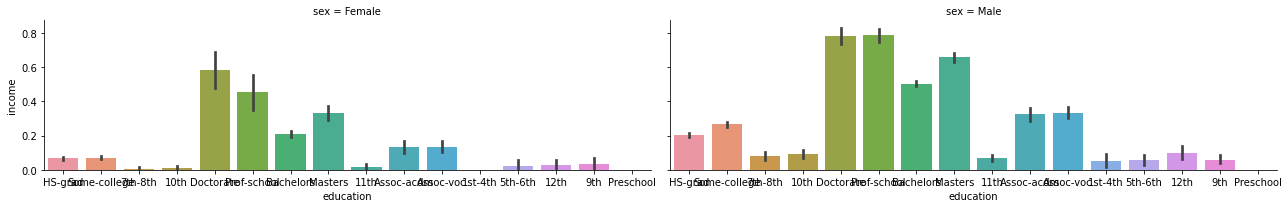

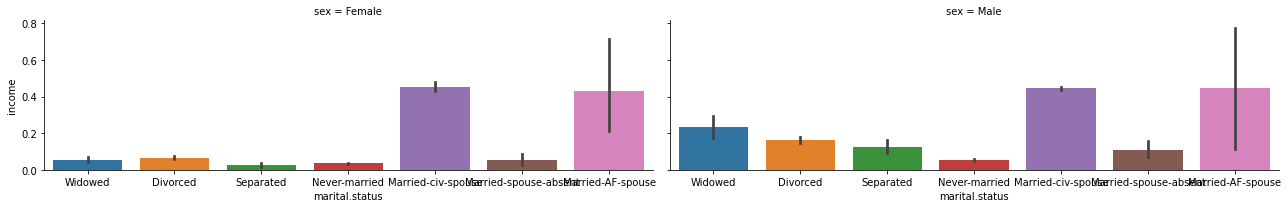

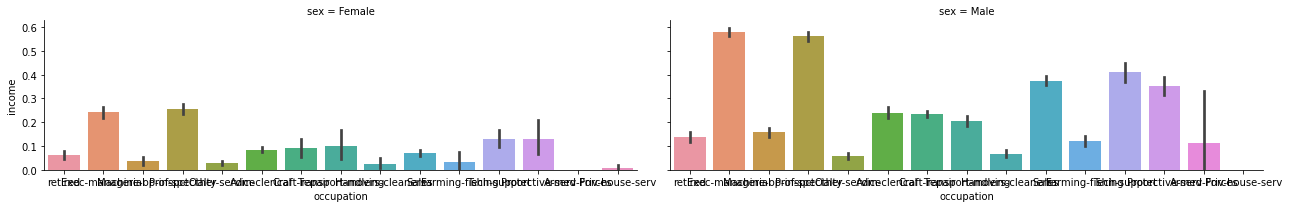

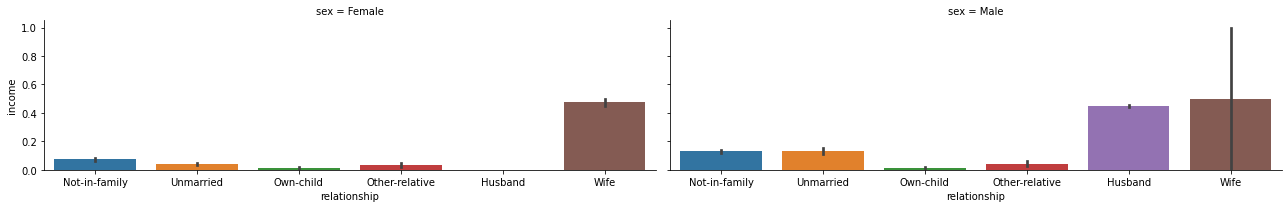

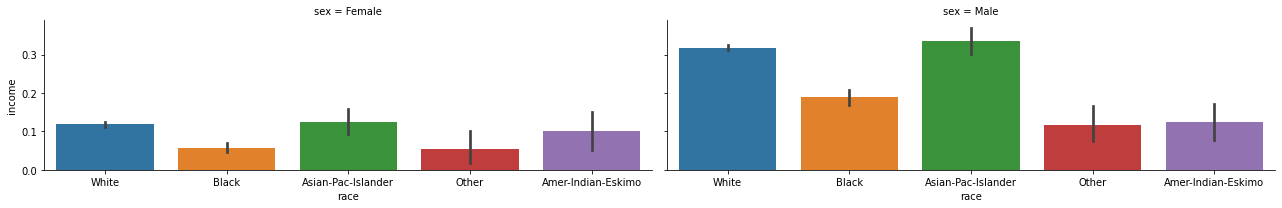

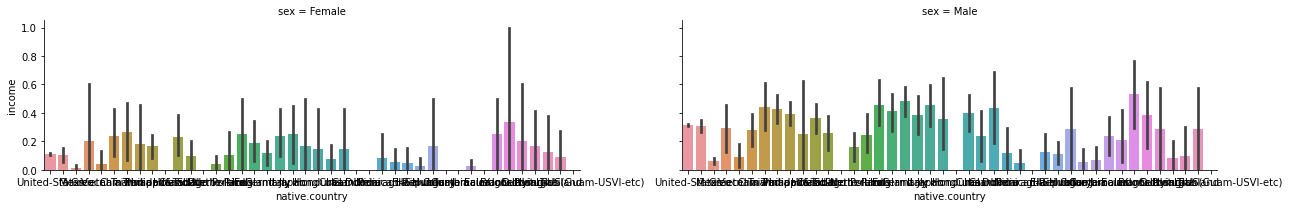

In [53]:
cat_ns_14 = cat_14.drop('sex')
for i in cat_ns_14: 
  g = sns.catplot( x=i, y='income',
                 col="sex",
                data=cen_14, kind="bar",
                height=3, aspect=3);